# Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import string
import time

# Loading Tweets

In [2]:
tweets = pd.read_csv("final.csv")
tweet = tweets.iloc[:, 1:]

# Preprocessing Tweets

In [3]:
kk=0;
def clean_text(txt):
    global kk
    kk=kk+1
    '''
    cleans the input text in the following steps:
    1 - replace contractions
    2 - removing punctuation
    3 - spliting into words
    4 - removing stopwords
    5 - removing leftover punctuations
    6 - lower-case everything
    '''
    contraction_dict = {   
        "ain't": "is_not", "aren't": "are_not","can't": "cannot", "'cause": "because", "could've": "could_have", 
        "couldn't": "could_not", "didn't": "did_not",  "doesn't": "does_not", "don't": "do_not",
        "hadn't": "had_not", "hasn't": "has_not", "haven't": "have_not", "he'd": "he_would","he'll": "he_will", 
        "he's": "he_is", "how'd": "how_did", "how'd'y": "how_do_you", "how'll": "how_will", "how's": "how_is",  
        "I'd": "I_would", "I'd've": "I_would_have", "I'll": "I_will", "I'll've": "I_will_have","I'm": "I_am", 
        "I've": "I_have", "i'd": "i_would", "i'd've": "i_would_have", "i'll": "i_will",  "i'll've": "i_will_have",
        "i'm": "i_am", "i've": "i_have", "isn't": "is_not", "it'd": "it_would", "it'd've": "it_would_have", 
        "it'll": "it_will", "it'll've": "it_will_have","it's": "it_is", "let's": "let_us", "ma'am": "madam", 
        "mayn't": "may_not", "might've": "might_have","mightn't": "might_not","mightn't've": "might_not_have", 
        "must've": "must_have", "mustn't": "must_not", "mustn't've": "must_not_have", "needn't": "need_not", 
        "needn't've": "need_not_have","o'clock": "of_the_clock", "oughtn't": "ought_not", 
        "oughtn't've": "ought_not_have", "shan't": "shall_not", "sha'n't": "shall_not", "shan't've": "shall_not_have",
        "she'd": "she_would", "she'd've": "she_would_have", "she'll": "she_will", "she'll've": "she_will_have", 
        "she's": "she_is", "should've": "should_have", "shouldn't": "should_not", "shouldn't've": "should_not_have", 
        "so've": "so_have","so's": "so_as", "this's": "this_is","that'd": "that_would", "that'd've": "that_would_have", 
        "that's": "that is", "there'd": "there_would", "there'd've": "there_would_have", "there's": "there is", 
        "here's": "here is","they'd": "they_would", "they'd've": "they_would_have", "they'll": "they_will", 
        "they'll've": "they_will_have", "they're": "they are", "they've": "they have", "to've": "to have", 
        "wasn't": "was_not", "we'd": "we_would", "we'd've": "we_would_have", "we'll": "we_will", 
        "we'll've": "we_will_have", "we're": "we are", "we've": "we have", "weren't": "were_not", "what'll": "what_will", 
        "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what_have", 
        "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", 
        "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", 
        "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will_not", 
        "won't've": "will_not_have", "would've": "would have", "wouldn't": "would_not", "wouldn't've": "would_not_have", 
        "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are",
        "y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", 
        "you'll've": "you will have", "you're": "you are", "you've": "you have"}
    
    def _get_contractions(contraction_dict):
        contraction_re = re.compile('(%s)' % '|'.join(contraction_dict.keys()))
        return contraction_dict, contraction_re

    def replace_contractions(text):
        contractions, contractions_re = _get_contractions(contraction_dict)
        def replace(match):
            return contractions[match.group(0)]
        return str(contractions_re.sub(replace, text))

    # replace contractions
    txt =  txt.lower()
    txt = replace_contractions(txt)
    
#     print(kk)
    
    
    txt =  re.sub('(@[A-Za-z0-9]+)|(\w+:\/\/\S+)', ' ', txt)
    
    #remove punctuations
    txt  = "".join([char for char in txt if char not in string.punctuation])
    txt = re.sub('[0-9]+', ' ', txt)
    txt = re.sub('([^0-9A-Za-z \t])',' ',txt)
    # split into words
    words = word_tokenize(txt)
    
    # remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    
    # removing leftover punctuations
    #words = [word for word in words if word.isalpha()]
    
    # lower-case everything
    
    
    # stem the words
    lem=WordNetLemmatizer()
    words = [lem.lemmatize(w) for w in words]
    
    
    cleaned_text = ' '.join(words)
    
    return cleaned_text

In [4]:
tweet['Tweets'] = tweet['Tweets'].apply(lambda txt: clean_text(str(txt)))

In [5]:
tweet = tweet.iloc[:, 0]
tweet0 = tweet[:500]

In [7]:
for row in tweet0:
    if str(row).startswith('farmer'):
        print(row)

farmer also demanded creation minimum support price msp bill ensure corporates control price vaccine msp support farmer
farmer also demanded creation minimum support price msp bill ensure corporates control price vaccine msp come
farmer also demanded creation minimum support price msp bill ensure corporates control price vaccine msp support farmer
farmer also demanded creation minimum support price msp bill ensure corporates control price vaccine msp repeal farm law
farmer also demanded creation minimum support price msp bill ensure corporates control price vaccine msp support farmer
farmer also demanded creation minimum support price msp bill ensure corporates control price vaccine msp farmer protest peacefully
farmer also demanded creation minimum support price msp bill ensure corporates control price vaccine msp farmer
farmer also demanded creation minimum support price msp bill ensure corporates control price vaccine msp take india back modi godi
farmer also demanded creation minim

# Algorithm

### functions

In [13]:
def algorithm(data):
    lines_thresh = iterator(data)
    lines_thresh_bool = filterer(lines_thresh)
    refined_data = extractor(lines_thresh_bool)
    return refined_data

In [14]:
def extractor(lines_thresh_bool):
    tweet_lines_thresh_bool = pd.DataFrame((np.array(lines_thresh_bool).T))
    tweet_lines_thresh_bool.insert(0,'tweet', pd.DataFrame(tweet0))

    l = set()
    for i in range(500):
        d = tweet_lines_thresh_bool[tweet_lines_thresh_bool[i] == True]['tweet'].to_dict()
        for k in d:
            d[k] = len(word_tokenize(d[k].strip()))
        d = dict(sorted(d.items(), key = lambda x: x[1], reverse=True))
        l.add(list(d.keys())[0])
    l = list(l)

    refined_tweets = tweet_lines_thresh_bool.loc[l, 'tweet'].to_list()
    return refined_tweets

In [15]:
def filterer(lines_thresh):
    lines_thresh_bool = []
    for line_thresh in lines_thresh:
        line_thresh_bool = []
        for thresh in line_thresh:
            if (thresh[0] <= 0.25) or (0.75 <= thresh[1]):
                line_thresh_bool.append(False)
            else:
                line_thresh_bool.append(True)
        lines_thresh_bool.append(line_thresh_bool)
    
    return lines_thresh_bool

In [16]:
def thresholder(line_bool):
    thresh_true = round(line_bool.count(True) / len(line_bool), 2)
    thresh_false = round(line_bool.count(False) / len(line_bool), 2)
    #thresh_none = round(line_bool.count(None) / len(line_bool), 2)
    
    thresh = thresh_true, thresh_false
    return thresh

In [17]:
def booleaner(line1, line2):
    n1 = len(line1)
    n2 = len(line2)
    n_min = min(n1, n2)
    
    line_bool = [] 
    for i in range(n_min):
        if line1[i] == line2[i]:
            line_bool.append(True)
        else:
            line_bool.append(False)
            
    if n1 >= n2:
        line = line1
    else:
        line = line2
        
    for remain_word in line[n_min:]:
        line_bool.append(False)
        
    return line_bool

In [18]:
def iterator(lines):
    n = len(lines)
    lines_thresh = []
    for line_i in range(n):
        line_thresh = []
        for line_j in range(n):
            line1 = word_tokenize(lines[line_i])
            line2 = word_tokenize(lines[line_j])
            line_bool = booleaner(line1, line2)
            thresh = thresholder(line_bool)
            line_thresh.append(thresh)
        lines_thresh.append(line_thresh)
    return lines_thresh

### working

In [28]:
lines_thresh = iterator(tweet0)

In [29]:
lines_thresh_bool = filterer(lines_thresh)

In [14]:
refined_tweets = extractor(lines_thresh_bool)

In [15]:
len(tweet0), len(refined_tweets)

(500, 465)

In [19]:
l1 = tweet0[0]
l2 = tweet0[1]
l3 = tweet0[2]
l = [l1, l2, l3]


['farmer also demanded creation minimum support price msp bill ensure corporates control price vaccine msp support farmer',
 'msp right farmer agri sector ability feed u reasonable price new law disturb performing sector pandemic appeal repeal three law asap vaccine msp',
 'farmer also demanded creation minimum support price msp bill ensure corporates control price vaccine msp come']

In [27]:
print(l1)
print(l3)
print(word_tokenize(l1))
print(word_tokenize(l3))
print(booleaner(word_tokenize(l1),word_tokenize(l3)))
print(thresholder(booleaner(word_tokenize(l1),word_tokenize(l3))))

farmer also demanded creation minimum support price msp bill ensure corporates control price vaccine msp support farmer
farmer also demanded creation minimum support price msp bill ensure corporates control price vaccine msp come
['farmer', 'also', 'demanded', 'creation', 'minimum', 'support', 'price', 'msp', 'bill', 'ensure', 'corporates', 'control', 'price', 'vaccine', 'msp', 'support', 'farmer']
['farmer', 'also', 'demanded', 'creation', 'minimum', 'support', 'price', 'msp', 'bill', 'ensure', 'corporates', 'control', 'price', 'vaccine', 'msp', 'come']
[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False]
(0.88, 0.12)


In [23]:
booleaner(word_tokenize(l1),word_tokenize(l2))

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [20]:
iterator(l)

[[(1.0, 0.0), (0.0, 1.0), (0.88, 0.12)],
 [(0.0, 1.0), (1.0, 0.0), (0.0, 1.0)],
 [(0.88, 0.12), (0.0, 1.0), (1.0, 0.0)]]

In [16]:
st = time.time()
refined_tweets = algorithm(tweet0)
print("total time :", time.time() - st)

total time : 78.44072961807251


<AxesSubplot:>

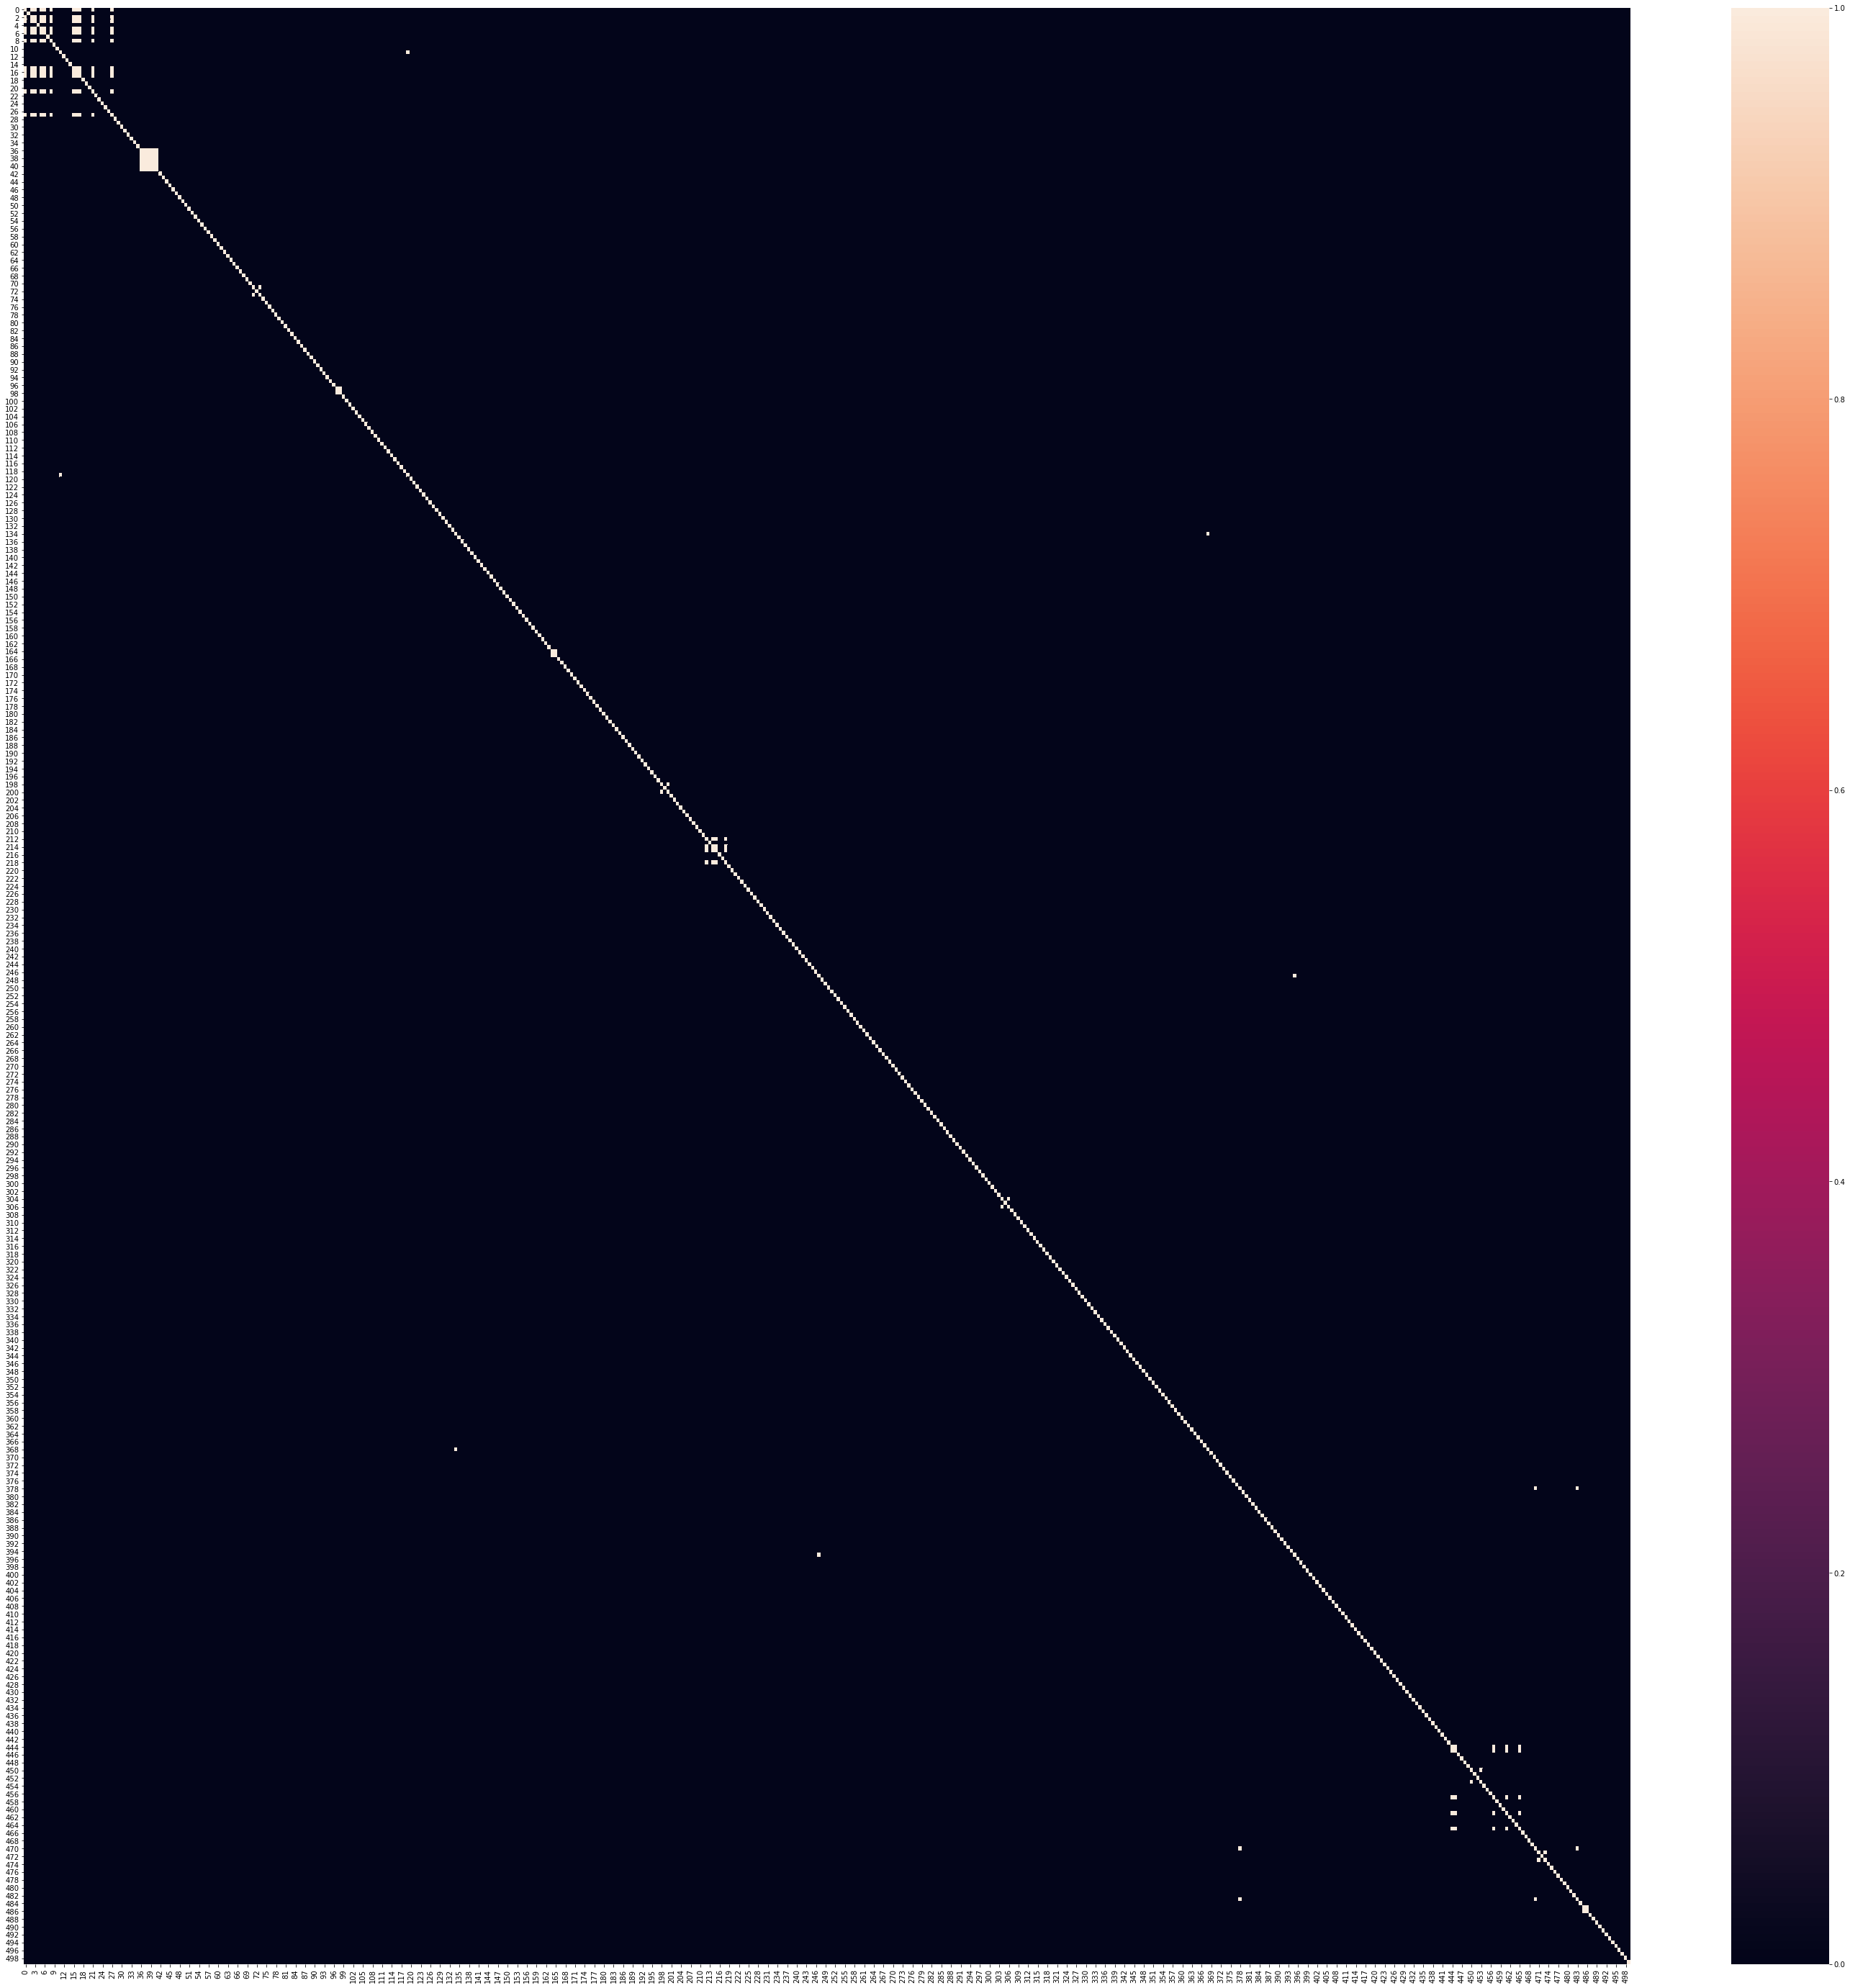

In [18]:
plt.figure(figsize = (50, 50))
sns.heatmap(lines_thresh_bool)